# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
import datetime 

# File to Load (Remember to change these)
city_data_to_load = "C:\My_Projects\PyBer_With_Matplotlib/city_data.csv"
ride_data_to_load ="C:\My_Projects\PyBer_With_Matplotlib/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
total_fare_amount = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_amount

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
mean_fare_per_ride=total_fare_amount/total_rides
mean_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
mean_fare_per_driver=total_fare_amount/total_drivers
mean_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
          "Total_Rides" : total_rides,
          "Total_Drivers": total_drivers,
          "Total_Fares": total_fare_amount,
          "Average_Fare_per_Ride": mean_fare_per_ride,
          "Average_Fare_per_Driver": mean_fare_per_driver})

pyber_summary_df

,Total_Rides,Total_Drivers,Total_Fares,Average_Fare_per_Ride,Average_Fare_per_Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total_Rides,Total_Drivers,Total_Fares,Average_Fare_per_Ride,Average_Fare_per_Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  8. Format the columns.
pyber_summary_df["Total_Rides"] = pyber_summary_df["Total_Rides"].map("{:,}".format)
pyber_summary_df["Total_Drivers"] = pyber_summary_df["Total_Drivers"].map("{:,}".format)
pyber_summary_df["Total_Fares"] = pyber_summary_df["Total_Fares"].map("${:,.2f}".format)
pyber_summary_df["Average_Fare_per_Ride"] = pyber_summary_df["Average_Fare_per_Ride"].map("${:,.2f}".format)
pyber_summary_df["Average_Fare_per_Driver"] = pyber_summary_df["Average_Fare_per_Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total_Rides,Total_Drivers,Total_Fares,Average_Fare_per_Ride,Average_Fare_per_Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fares_date_city=pyber_data_df.groupby(["type","date"]).sum()["driver_count"]
total_fares_date_city

type   date               
Rural  2019-01-01 09:45:36     1
       2019-01-02 11:18:32     1
       2019-01-03 19:51:01     8
       2019-01-04 03:31:26     8
       2019-01-06 07:38:40     4
                              ..
Urban  2019-05-08 04:20:00    52
       2019-05-08 04:39:49    11
       2019-05-08 07:29:01    33
       2019-05-08 11:38:35     4
       2019-05-08 13:10:18    58
Name: driver_count, Length: 2375, dtype: int64

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_df = pyber_data_df.reset_index()


In [34]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_fare = pyber_data_df.pivot(index="date" , columns="type", values="fare")
pivot_fare

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [39]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pivot_fare_range=pivot_fare.loc['2019-01-01':'2019-04-29']
pivot_fare_range

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [45]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pivot_fare_range.index = pd.to_datetime(pivot_fare_range.index)

In [46]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_fare_range.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [50]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fare_per_week=pivot_fare_range.resample('W').sum()
sum_fare_per_week


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


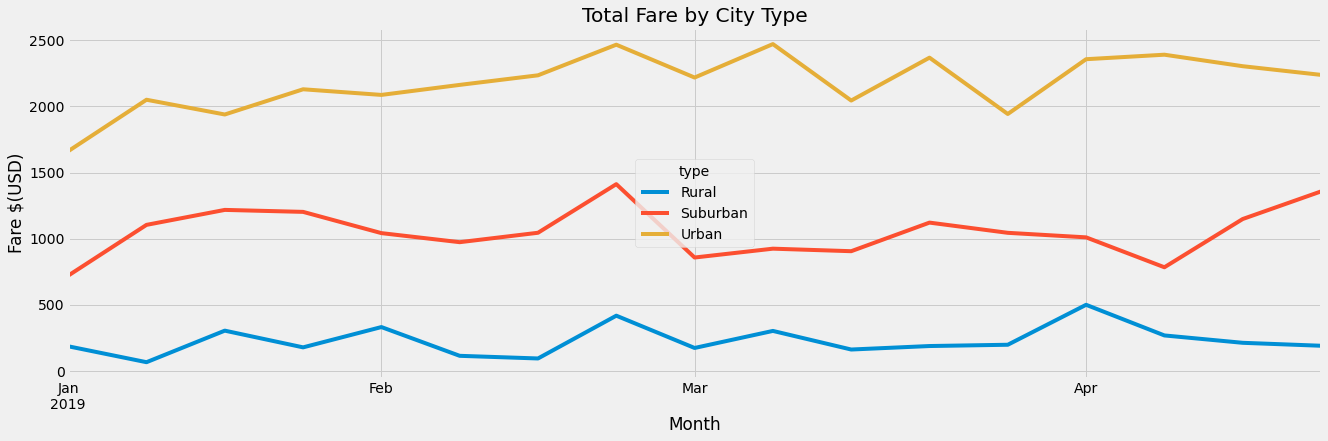

In [104]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
from matplotlib import style
style.use('fivethirtyeight')
weekly_fare = sum_fare_per_week.plot(figsize = (20,6))
weekly_fare.set_title("Total Fare by City Type")
weekly_fare.set_xlabel("Month")
weekly_fare.set_ylabel("Fare $(USD)")
plt.savefig("C:\My_Projects\PyBer_With_Matplotlib/weekly_fare.png")
plt.show()


